<a href="https://colab.research.google.com/github/wafa17/Machine_Learning/blob/master/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.dpi'] = 150

In [0]:
from google.colab import files
uploaded = files.upload()

Saving fifa20.csv to fifa20.csv


In [0]:
df = pd.read_csv('fifa20.csv')
df.shape

(18278, 104)

In [0]:
df.head()

In [0]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.

In [0]:
ax = sns.heatmap(df.isna())

In [0]:
datset = df.select_dtypes(include = ['float64', 'int64',]).iloc[:, :].corr()
sns.heatmap(datset, annot = True, cmap = 'coolwarm')
plt.show()

In [0]:
# menghilangkan kolom yang null
print(df.isnull().sum())

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64


import dataset yang akan digunakan

In [0]:
from google.colab import files
uploaded = files.upload()

Saving datasets.csv to datasets.csv


In [0]:
data = pd.read_csv('datasets.csv')
data.shape

(18278, 9)

In [0]:
data.head()

,age,height_cm,weight_kg,overall,potential,international_reputation,weak_foot,skill_moves,real_face
0,32,170,72,94,94,5,4,4,1
1,34,187,83,93,93,5,4,5,1
2,27,175,68,92,92,5,5,5,1
3,26,188,87,91,93,3,3,1,1
4,28,175,74,91,91,4,4,4,1


In [0]:
# cek data null
data[data.isnull().any(axis=1)]

In [0]:
print(data.isnull().sum())

age                         0
height_cm                   0
weight_kg                   0
overall                     0
potential                   0
international_reputation    0
weak_foot                   0
skill_moves                 0
real_face                   0
dtype: int64


In [0]:
data.dtypes

age                         int64
height_cm                   int64
weight_kg                   int64
overall                     int64
potential                   int64
international_reputation    int64
weak_foot                   int64
skill_moves                 int64
real_face                   int64
dtype: object

<Figure size 10000x10000 with 0 Axes>

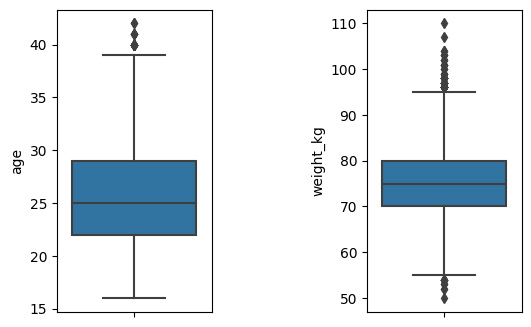

In [0]:
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 100
plt.figure(figsize=(100, 100))
f, axes = plt.subplots(1, 2)
sns.boxplot(y=df["age"], ax=axes[0])
sns.boxplot(y=df["weight_kg"], ax=axes[1])
plt.subplots_adjust(wspace=1)

**Feature Selection** 
---
Penghapusan Fitur Rekursif (atau RFE) bekerja dengan menghapus atribut secara rekursif dan membangun model pada atribut yang tersisa. Ini menggunakan akurasi model untuk mengidentifikasi atribut mana (dan kombinasi atribut) yang paling berkontribusi untuk memprediksi atribut target




In [0]:
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

array = data.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 4)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_) 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Num Features: 4
Selected Features: [False False False  True False  True  True  True]
Feature Ranking: [4 2 3 1 5 1 1 1]


In [0]:
df = data.drop(['age','height_cm','weight_kg','potential','real_face'],axis=1)

In [0]:
df.shape

(18278, 4)

Korelasi antar fitur

In [0]:
datset = df.select_dtypes(include = ['float64', 'int64',]).iloc[:, :].corr()
plt.figure(figsize=(5, 5))
ax = sns.heatmap(datset, vmax=1, square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

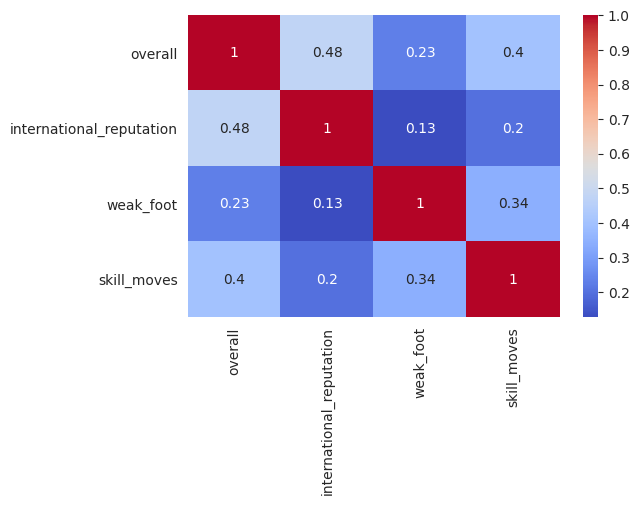

In [0]:
datset = df.select_dtypes(include = ['float64', 'int64',]).iloc[:, :].corr()
sns.heatmap(datset, annot = True, cmap = 'coolwarm')
plt.show()

In [0]:
datset

,overall,international_reputation,weak_foot,skill_moves
overall,1.000000,0.475557,0.230276,0.401261
international_reputation,0.475557,1.000000,0.127792,0.199696
weak_foot,0.230276,0.127792,1.000000,0.343895
skill_moves,0.401261,0.199696,0.343895,1.000000


In [0]:
from google.colab import files
df.to_csv('dataKlasifikasi.csv')
files.download("dataKlasifikasi.csv")